# Fitness club attendance prediction problem

GoalZone is a fitness club chain in Canada. GoalZone offers a range of fitness classes in two capacities - 25 and 15. Some classes are always fully booked. Fully booked classes often have a low attendance rate.

PROBLEM STATEMENT: GoalZone wants to increase the number of spaces available for classes. They want to do this by predicting whether the member will attend the class or not. If they can predict a member will not attend the class, they can make another space available.

## Task 1 

## EDA 

First, we start with importing libraries required for our initial analysis. 

Second, we load our dataset and apply info() method to see data types and null values to check if the values match their description given in the instruction.

Next, we use .unique() method on the dataset to explore the unique values of each variable.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [54]:
df = pd.read_csv('/kaggle/input/datacamps-data-science-associate-certification/fitness_class_2212.csv') 
df.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [55]:
# checking the data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


In [56]:
# checking for unique values
for column in df:
    print(f"Column: {column}")
    print(df[column].value_counts())
    print("\n")

Column: booking_id
1       1
998     1
1007    1
1006    1
1005    1
       ..
498     1
497     1
496     1
495     1
1500    1
Name: booking_id, Length: 1500, dtype: int64


Column: months_as_member
8      99
7      93
6      92
9      85
5      80
       ..
60      1
90      1
105     1
62      1
69      1
Name: months_as_member, Length: 72, dtype: int64


Column: weight
78.28    5
84.64    4
75.63    4
76.18    3
69.00    3
        ..
65.01    1
73.09    1
86.22    1
79.44    1
94.39    1
Name: weight, Length: 1241, dtype: int64


Column: days_before
10         293
2          199
8          194
12         178
14         172
4          154
6           70
7           38
3           31
5           30
11          26
13          25
15          24
9           24
1            9
10 days      6
14 days      3
12 days      3
6 days       3
4 days       3
16           3
17           3
20           1
2 days       1
5 days       1
7 days       1
8 days       1
1 days       1
3 days       1
13 d

### a. 
* 'booking_id' - Doesn't match the description
* 'months_as_member' - Matches
* 'weight' - Matches, but it has missing values
* 'days_before' - Doesn't match
* 'day_of_week' - Doesn't match
* 'time' - Doesn't match
* 'category' - Doesn't match
* 'attended' - Doesn't match

### b. 
The 'weight' column has 20 null values

### c. 
To match the desciption provided in the document , the following steps were applied:

* 'booking_id' - column is currently of the type int64, but we need it to be treated as nominal data (which is categorical and non-numerical), we convert it to a string by applying .astype('str')

* 'weight' - replaced missing values with the mean using .fillna(df['weight'].mean()) method

* 'days_before' - some values contain 'days' next to a number,firstly, we extract numbers from a string in a column using the str.extract() method combined with a regular expression, then we apply .astype('int') to convert from the obj type to the integer type since the column has to be discrete.

* 'day_of_week' - there are misspellings like 'Wednesday , Fri. , Monday'. Firstly, the dictionary was created for the replacements, secondly, the .replace() method was applied to the column passing the replacements dict, then converted to a category dtype using .astype('category') 

* 'time' -  Converted the column to a category type with the defined order using pd.Categorical passing the defined order and setting ordered parameter to True.

* 'category' - after checking the unique values we find 13 '-' values, we will treat them as null values an replace with 'unknown' using .replace() method, then convert to a category dtype using .astype('category') 

* 'attended' - converted to a category dtype using .astype('category') 

In [57]:
#cleaning the data to match the description
df['booking_id'] = df['booking_id'].astype('str')

df['weight'] = df['weight'].fillna(df['weight'].mean())

df['days_before'] = df['days_before'].str.extract('(\d+)').astype('int')

#Replacing the strings in the 'day_of_week' column by creating a dictionary 
#with replacements and passing it to .replace() method
replacements = {
    'Wednesday': 'Wed',
    'Monday': 'Mon',
    'Fri.': 'Fri'
}

df['day_of_week'] = df['day_of_week'].replace(replacements).astype('category') 

df['time'] = pd.Categorical(df['time'], categories=['AM','PM'], ordered=True)

df['category'] = df['category'].replace('-','unknown').astype('category')

df['attended'] = df['attended'].astype('category') 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   booking_id        1500 non-null   object  
 1   months_as_member  1500 non-null   int64   
 2   weight            1500 non-null   float64 
 3   days_before       1500 non-null   int64   
 4   day_of_week       1500 non-null   category
 5   time              1500 non-null   category
 6   category          1500 non-null   category
 7   attended          1500 non-null   category
dtypes: category(4), float64(1), int64(2), object(1)
memory usage: 53.7+ KB


As it can be seen, the data was succesfully adjusted to match the description. Now we will check the descriptive statistics of the data to better undestand the numerical data.

In [58]:
df.describe()

,months_as_member,weight,days_before
count,1500.000000,1500.000000,1500.000000
mean,15.628667,82.610378,8.346667
std,12.926543,12.680411,4.077938
min,1.000000,55.410000,1.000000
25%,8.000000,73.562500,4.000000
50%,12.000000,81.035000,9.000000
75%,19.000000,89.382500,12.000000
max,148.000000,170.520000,29.000000


Descriptive statistics of the data:

* Months as Member: Members usually stay for about 15.6 months, but this varies a lot. There seems to be an outlier with a maximum value of 148 months, this neeeds to be further investigated.
* Weight: The average weight is about 82.6 units, with most members weighing between 73.6 and 89.4 units.
* Days Before: People typically book about 8.3 days in advance, and this mostly leans to longer lead times.

## Task 2

Now we will create some visualisation to better understand the bookings attandance. The most straightforward way to understand how many bookings attended the class is to build a bar plot showing the counts of observations in each category of 'attended' column. For that we will use Seaborn's countplot. 

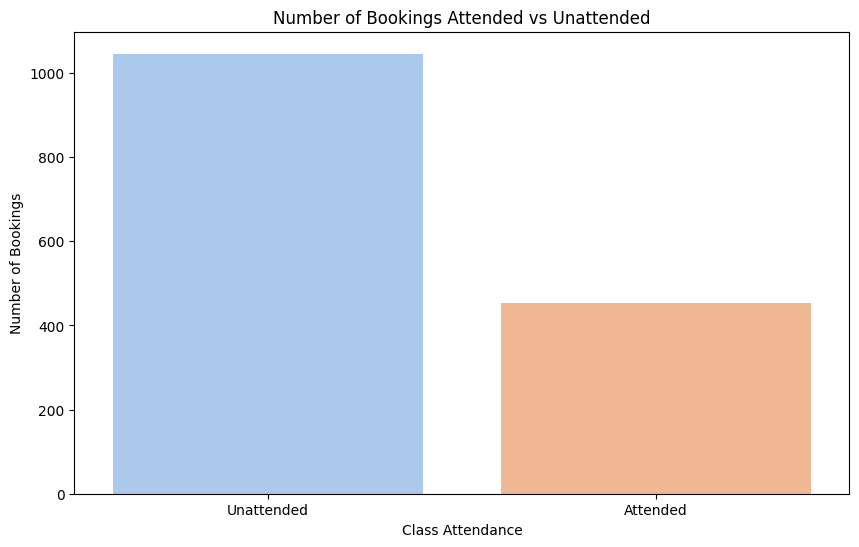

In [60]:
plt.figure(figsize=(10, 6))
sns.set_palette("pastel")

sns.countplot(x='attended', data=df)

plt.title('Number of Bookings Attended vs Unattended')
plt.xlabel('Class Attendance')
plt.ylabel('Number of Bookings')
plt.xticks(ticks=[0, 1], labels=['Unattended', 'Attended'])
plt.show()

It's clear from the barplot that only third of the bookings attended the fitness class.

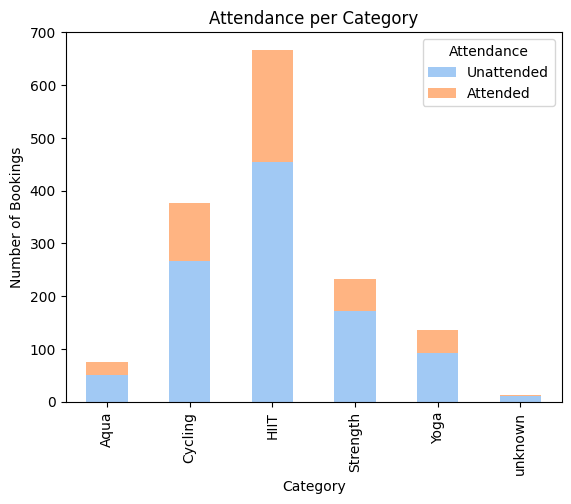

In [61]:
#using pandas groupby and value_counts to count the instances of attendance by category to plot it as a stacked bar chart
cat_attended_counts = df.groupby('category')['attended'].value_counts().unstack()

cat_attended_counts.plot(kind='bar',stacked=True)
plt.title('Attendance per Category')
plt.xlabel('Category')
plt.ylabel('Number of Bookings')
plt.legend(title='Attendance', labels=['Unattended', 'Attended'])

### a. 
From the stacked bar plot above we can clearly state that HIIT category has the highest number of bookings and the highest number of attandances among other categories.

### b. 
The observations are imbalanced across all categories, with unattendeces (0) almost twice as much as attandances (1) among all categories.

## Task 3

Text(0, 0.5, 'Number of members')

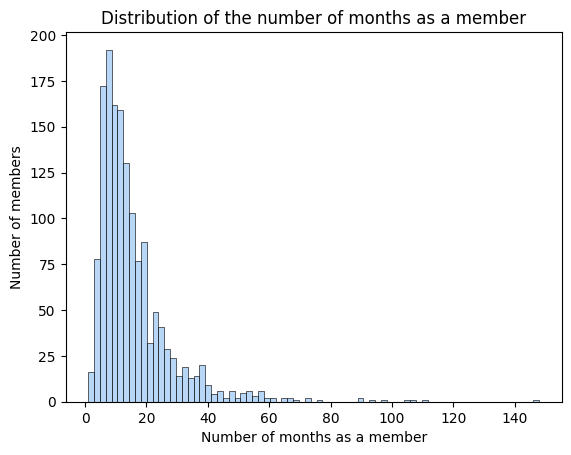

In [62]:
#Plotting the distribution of the number of months as a member
sns.histplot(x='months_as_member',data=df)
plt.title('Distribution of the number of months as a member')
plt.xlabel('Number of months as a member')
plt.ylabel('Number of members')

The distribution of the "months_as_member" is right-skewed. The highest peak occurs in the early months, which suggests that a large proportion of members have been with GoalZone for a shorter duration. The count is highest for members who have been there for just a few months. As membership length increases, the number of members decreases. We see fewer members who've been around for over 100 months, they might be considered outliers. To conclude, while many members join, not all stay for extended periods, resulting in fewer long-term members.

## Task 4

([<matplotlib.axis.XTick at 0x7f6dea350d30>,
 [Text(0, 0, 'Unattended'), Text(1, 0, 'Attended')])

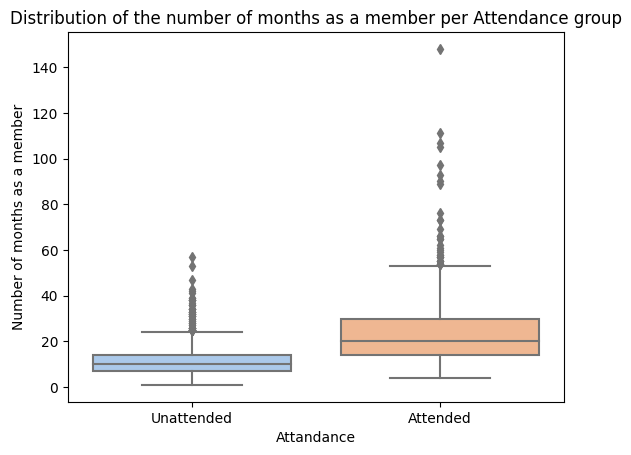

In [63]:
#Plotting boxplots to describe the relationship between attendance and number of months as a member.
sns.boxplot(x='attended',y='months_as_member',data=df)
plt.title('Distribution of the number of months as a member per Attendance group')
plt.xlabel('Attandance')
plt.ylabel('Number of months as a member')
plt.xticks(ticks=[0, 1], labels=['Unattended', 'Attended'])

There is a pattern suggesting that longer-term members are more likely to attend, while newer members have a higher tendency not to attend. However, exceptions exist in both groups. 
There are also many outliers, especially towards the higher end, with some members who've been around for a very long time still attending the classes.
But very high values could represent long-time loyal customers, so in the further analysis removing them could remove significant data about these loyalists. 

## Task 5

This is a classification problem, as we aim to classify members into two groups: those who will attend and those who won't.

## Task 6

We choose a Logistic Regression as a baseline model to predict whether members will attend. 

First, we drop 'booking_id' column as it doesn't hold any predictive power and then we split the data into training and testing sets. When splitting the data, we set stratify parameter to y since we have an imbalanced data, this insures that data in train and test sets are similarly imbalanced. 

Secondly, we handle outliers. 

Thirdly, we encode categorical variables using one-hot encoding from sklearn.
To handle categories that might appear in the test set but not in the training set after splitting, we set the handle_unknown parameter to 'ignore'.

In [64]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression

X = df.drop(columns = ['attended', 'booking_id'], axis=1)
y = df['attended']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


<AxesSubplot: >

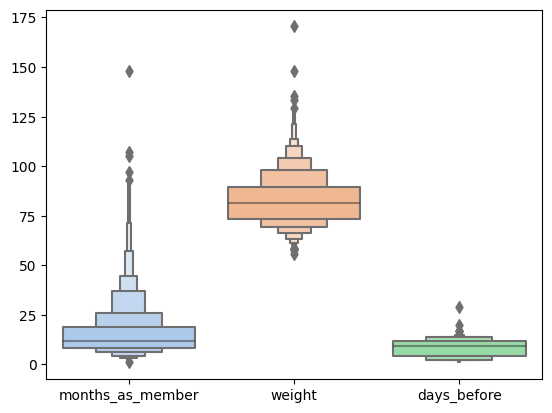

In [65]:
#checking the outliers 
sns.boxenplot(data=X_train)

Looking at the boxen plots and understanding each variable:

**months_as_member:** As it was mentioned earlier in the analysis, the outliers might represent long-term loyal members.
Instead of removing them, we will categorize this feature into 0-12, 13-24, 25-36, and 36+ months. This would ensure that the influence of very long-term members isn't overly pronounced while still considering their information.

**weight:** This variable has a wider interquartile range, and several outliers on both the upper and lower sides. However, as weight varies significantly across individuals, these outliers might be genuine observations. We will apply logarithmic transformation to reduce the influence of extreme values.

**days_before:** The distribution is quite compact, and there are a few outliers on the upper side. But given the business context, these might represent members who plan well in advance, so these outliers might be kept. 

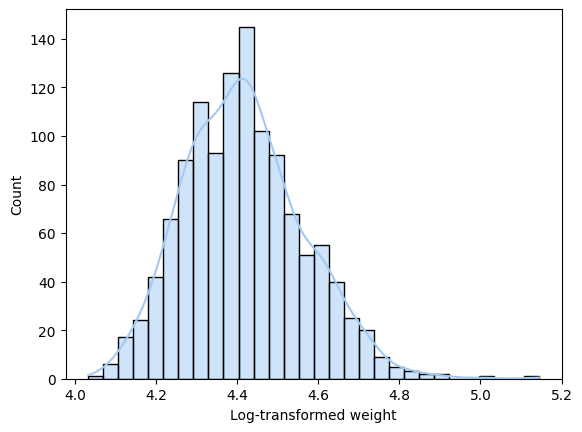

In [66]:
#handling outliers
bins = [0, 12, 24, 36, X_train['months_as_member'].max()+1]
labels = ['0-12', '13-24', '25-36', '37+']
X_train['months_as_member'] = pd.cut(X_train['months_as_member'], bins=bins, labels=labels, right=False)
X_test['months_as_member'] = pd.cut(X_test['months_as_member'], bins=bins, labels=labels, right=False)

X_train['weight'] = np.log1p(X_train['weight'])
X_test['weight'] = np.log1p(X_test['weight'])

#Plotting transformed weight column
sns.histplot(data=X_train, x='weight', kde=True)
plt.xlabel('Log-transformed weight')
plt.show()

We can see the distribution is close to normally distributed now.

In [67]:
#Encoding categorical variables using one-hot encoding
categorical_columns = ['months_as_member','day_of_week', 'time', 'category'] 

encoder = OneHotEncoder(drop='first', handle_unknown='ignore')
encoder.fit(X_train[categorical_columns])

X_train_encoded = encoder.transform(X_train[categorical_columns])
X_test_encoded = encoder.transform(X_test[categorical_columns])

#Converting the transformed data into a dataframe
X_train_encoded = pd.DataFrame(X_train_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

X_test_encoded = pd.DataFrame(X_test_encoded.toarray(), columns=encoder.get_feature_names_out(categorical_columns))

In [68]:
#Dropping the categorical columns from original dataframes
X_train_dropped = X_train.drop(columns=categorical_columns)
X_test_dropped = X_test.drop(columns=categorical_columns)

#Concatenating the original dataframe and the one-hot encoded dataframe
X_train_final = pd.concat([X_train_dropped.reset_index(drop=True), X_train_encoded.reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test_dropped.reset_index(drop=True), X_test_encoded.reset_index(drop=True)], axis=1)

In [69]:
#Fitting Logistic Regression model and predicting on test data
logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_final, y_train)

y_pred_logreg = logreg.predict(X_test_final)

## Task 7
Next, we fit the Random Forest Classifier model as a comparison model and predict values on the test set

In [70]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)

rf.fit(X_train_final, y_train)

y_pred_rf = rf.predict(X_test_final)

## Task 8

I chose Logistic Regression as a baseline model because it's a simple, easy to implement and interprete algorithm with a straightforward probabilistic framework for binary classification tasks as this one. It's also less sensitive to outliers compared to some other models like KNN.

While Random Forest was selected as a comparison model becasue of its non-linear nature and the capability to capture complex nonlinear relationships in the data. By comparing a simple linear model like Logistic Regression with a more sophisticated ensemble model like Random Forest we can determine if capturing non-linear patterns offers significant performance improvements over a basic linear approach.

## Task 9
Considering the imbalanced nature of the data, it would be more suitable to focus on F1 Score and AUC-PR as these metrics could give a balanced view of the models' performances. 

F1 Score: It provides a harmonic mean of precision and recall.

AUC-PR: The PR curve plots Precision vs. Recall and focuses on the performance of a classifier on the positive (minority) class.


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.94      0.86       209
           1       0.77      0.45      0.57        91

    accuracy                           0.79       300
   macro avg       0.79      0.70      0.72       300
weighted avg       0.79      0.79      0.77       300


Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       209
           1       0.56      0.52      0.54        91

    accuracy                           0.73       300
   macro avg       0.68      0.67      0.67       300
weighted avg       0.72      0.73      0.73       300



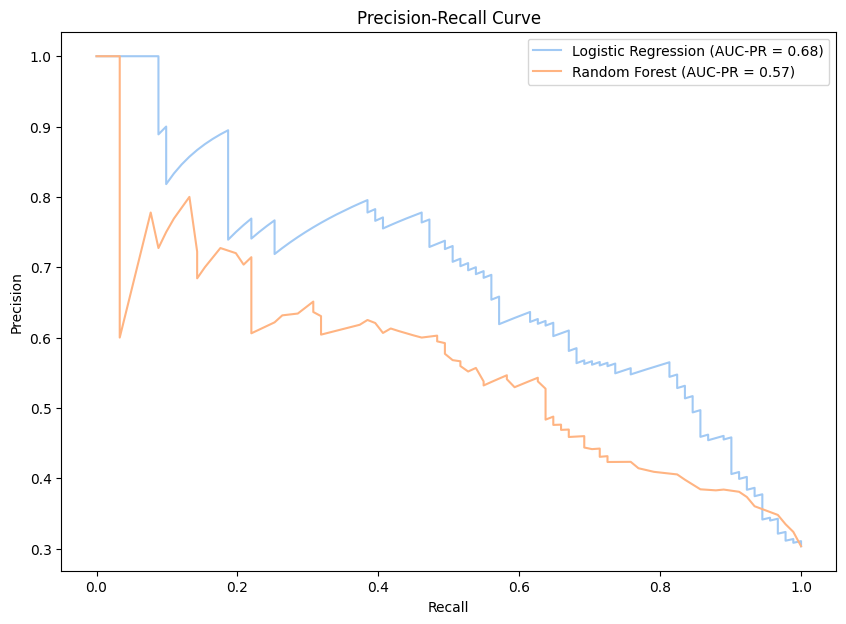

In [71]:
from sklearn.metrics import classification_report, average_precision_score, precision_recall_curve

#Evaluating the models F1-score
print("\nLogistic Regression Classification Report:\n", classification_report(y_test, y_pred_logreg))
print("\nRandom Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Predicting probabilities for the Logistic Regression and Random Forest models
logreg_probs = logreg.predict_proba(X_test_final)[:, 1]
rf_probs = rf.predict_proba(X_test_final)[:, 1]

# Calculating average precision score for both models
logreg_avg_precision = average_precision_score(y_test, logreg_probs)
rf_avg_precision = average_precision_score(y_test, rf_probs)

# Calculating the precision-recall curves
logreg_precision, logreg_recall, _ = precision_recall_curve(y_test, logreg_probs)
rf_precision, rf_recall, _ = precision_recall_curve(y_test, rf_probs)

#Plotting
plt.figure(figsize=(10, 7))
plt.plot(logreg_recall, logreg_precision, label=f'Logistic Regression (AUC-PR = {logreg_avg_precision:.2f})')
plt.plot(rf_recall, rf_precision, label=f'Random Forest (AUC-PR = {rf_avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

## Task 10

**F1-Score Comparison:**

- For Class 0:
Logistic Regression outperforms the Random Forest model for predicting Class 0, with a higher F1-score of 0.86 compared to 0.81.

- For Class 1:
Again, Logistic Regression has a slightly better F1-score for predicting Class 1, with a score of 0.57 compared to the Random Forest's score of 0.54.

**AUC-PR Comparison:**

Logistic Regression model has a higher AUC-PR (0.68) compared to the Random Forest model (0.57), which suggests that it generally performs better in distinguishing between the positive class and the negative class. 

Logistic Regression model has higher precision than the Random Forest. This indicates that, when trying to capture almost all of the positive cases (high recall), the Logistic Regression model makes fewer mistakes (higher precision) than the Random Forest model.

**Conclusion:**

This suggests that Logistic Regression might be a more suitable model for predicting whether members will attend as it shows better Precision, Recall and F1-Score.